<a href="https://colab.research.google.com/github/sanaa-sys/Brain-Tumor-Analysis/blob/main/Brain_Tumor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:00<00:00, 184MB/s]
100% 149M/149M [00:00<00:00, 177MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_path = []
  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_path.append(image_path)
  df = pd.DataFrame({'Class': classes, 'Class Path': class_path})
  return df

In [ ]:
tr_df = get_class_paths("/content/Training")
tr_df.head(5)

,Class,Class Path
0,notumor,/content/Training/notumor/Tr-no_0794.jpg
1,notumor,/content/Training/notumor/Tr-no_1039.jpg
2,notumor,/content/Training/notumor/Tr-no_0972.jpg
3,notumor,/content/Training/notumor/Tr-no_0559.jpg
4,notumor,/content/Training/notumor/Tr-no_1252.jpg


In [ ]:
ts_df = get_class_paths("/content/Training")
ts_df.head(5)

,Class,Class Path
0,notumor,/content/Training/notumor/Tr-no_0794.jpg
1,notumor,/content/Training/notumor/Tr-no_1039.jpg
2,notumor,/content/Training/notumor/Tr-no_0972.jpg
3,notumor,/content/Training/notumor/Tr-no_0559.jpg
4,notumor,/content/Training/notumor/Tr-no_1252.jpg


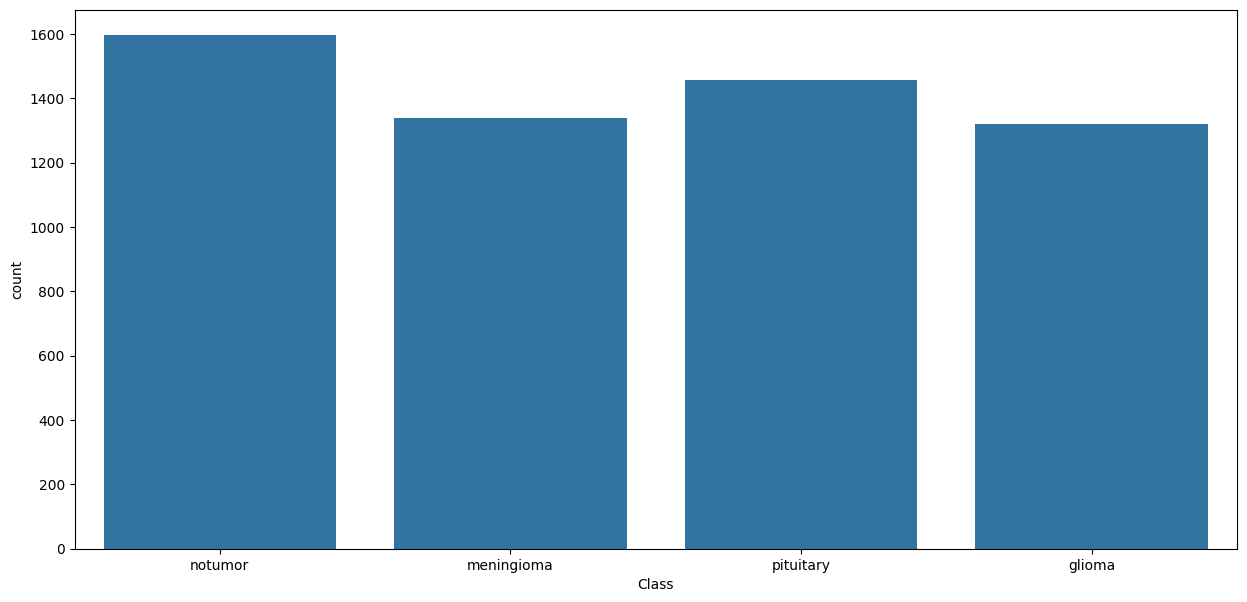

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = "Class", data = tr_df)


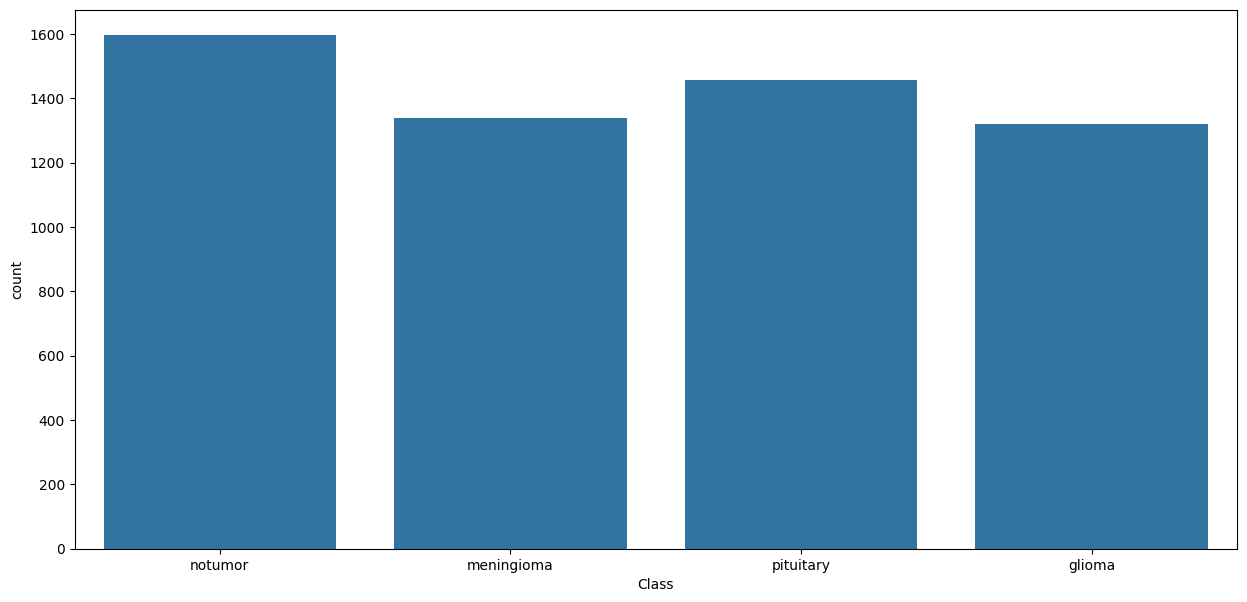

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = "Class", data = ts_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size = 0.5, random_state = 42, stratify = ts_df["Class"])

In [ ]:
batch_size = 32
img_size = (299, 299)
image_generator = ImageDataGenerator(rescale = 1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    dataframe = ts_df,
    x_col = "Class Path",
    y_col = "Class",
    target_size = img_size)
valid_gen = image_generator.flow_from_dataframe(
    dataframe = valid_df,
    x_col = "Class Path",
    y_col = "Class",
    target_size = img_size)
ts_gen = image_generator.flow_from_dataframe(
    dataframe = ts_df,
    x_col = "Class Path",
    y_col = "Class",
    target_size = img_size, shuffle = False)

Found 2856 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.


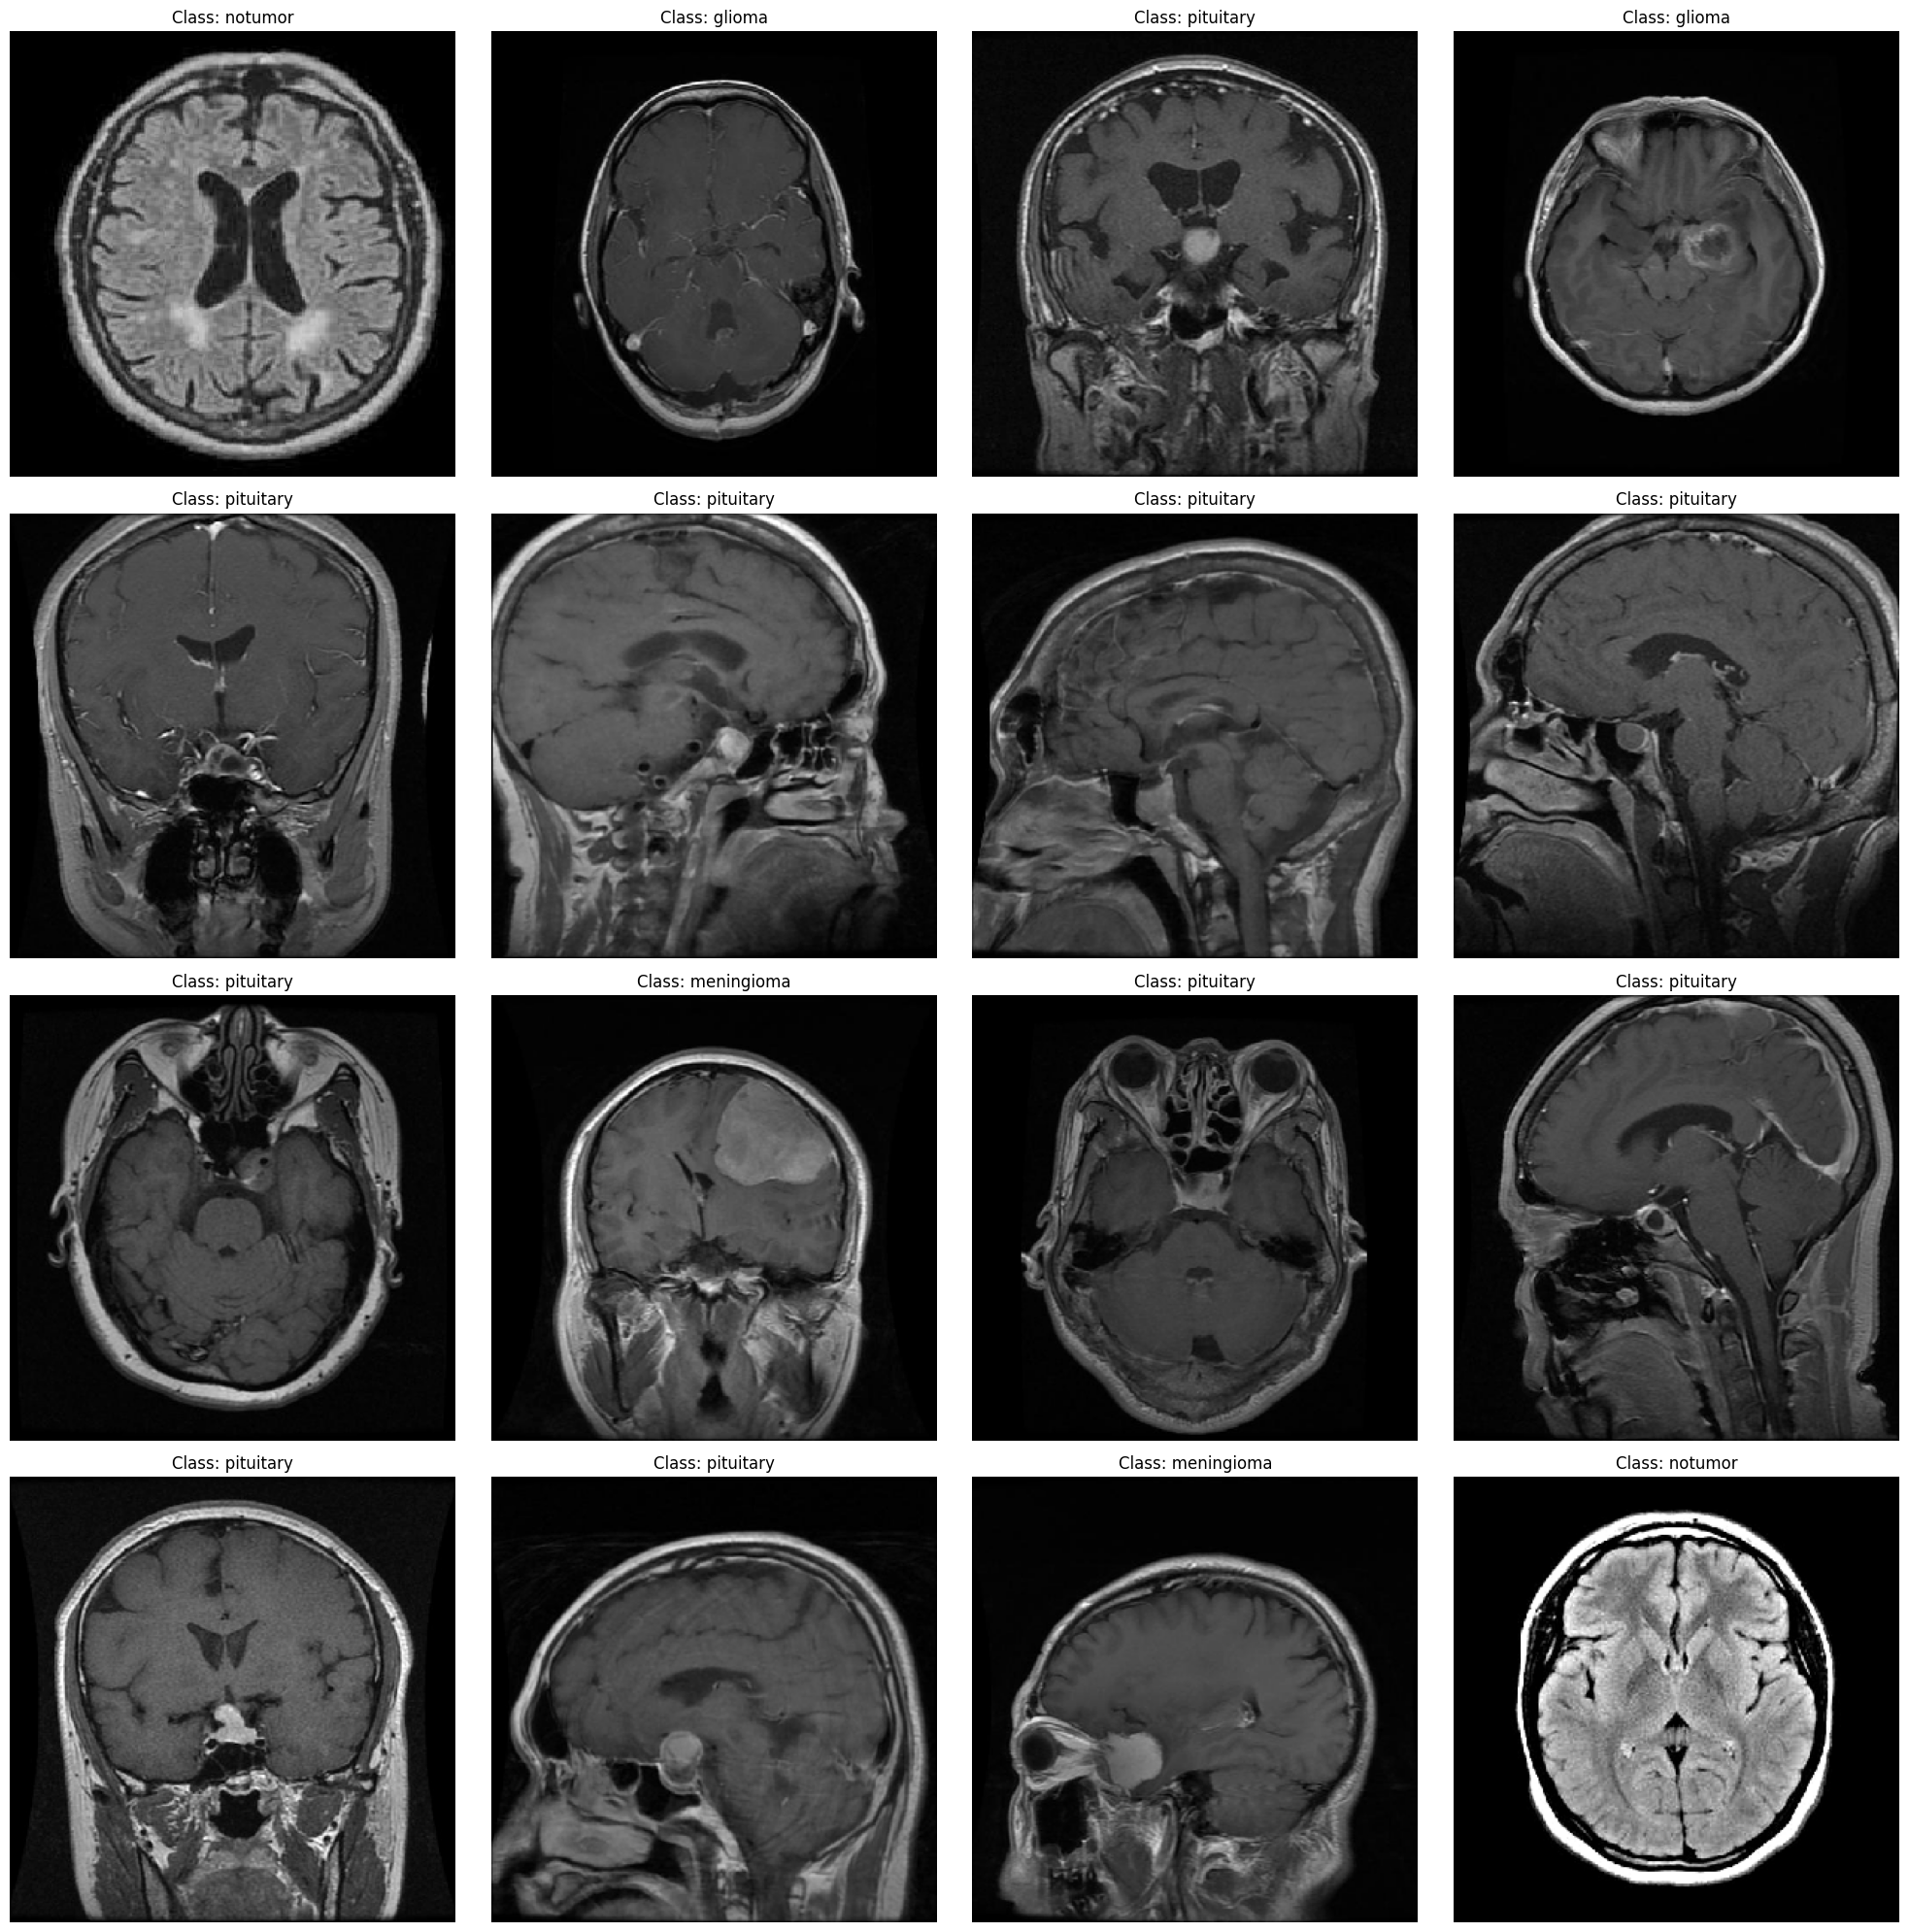

In [ ]:
plt.figure(figsize = (20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  img = batch[0][0]
  label = batch[1][0]
  plt.imshow(img)
  class_index = np.argmax(label)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())
  index_position = class_indices.index(class_index)
  class_name = class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)
base_model = tf.keras.applications.Xception(input_shape = img_shape, include_top = False, weights = "imagenet", pooling = "max")
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.5),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate = 0.001),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy',
                                Precision(),
                                Recall()])

In [ ]:
hist = model.fit(tr_gen,
                 validation_data = valid_gen,
                 epochs = 5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.6602 - loss: 1.0754 - precision: 0.7429 - recall: 0.4816 - val_accuracy: 0.8221 - val_loss: 0.6107 - val_precision: 0.8283 - val_recall: 0.8127
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 113s 959ms/step - accuracy: 0.9589 - loss: 0.1331 - precision: 0.9625 - recall: 0.9569 - val_accuracy: 0.8746 - val_loss: 0.3579 - val_precision: 0.8785 - val_recall: 0.8711
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 952ms/step - accuracy: 0.9891 - loss: 0.0393 - precision: 0.9900 - recall: 0.9883 - val_accuracy: 0.9366 - val_loss: 0.1914 - val_precision: 0.9397 - val_recall: 0.9335
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 951ms/step - accuracy: 0.9955 - loss: 0.0234 - precision: 0.9955 - recall: 0.9951 - val_accuracy: 0.9426 - val_loss: 0.1920 - val_precision: 0.9471 - val_recall: 0.9408
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 951ms/step - accuracy: 0.9940 - loss: 0.0157 - precision: 0.9940 - recall: 0.9940 - val_accuracy: 0.9069 - val_loss: 0.3197 - val_

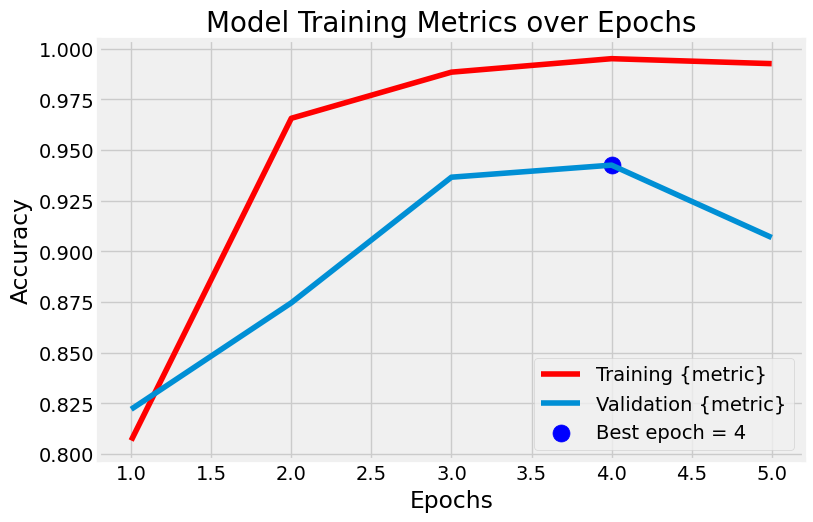

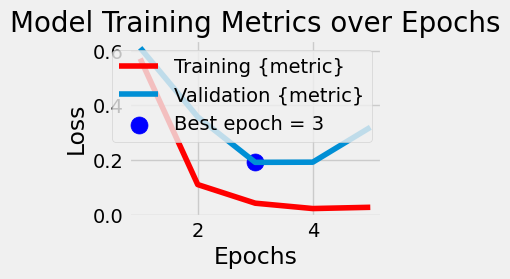

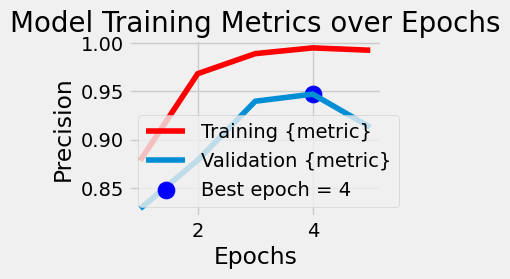

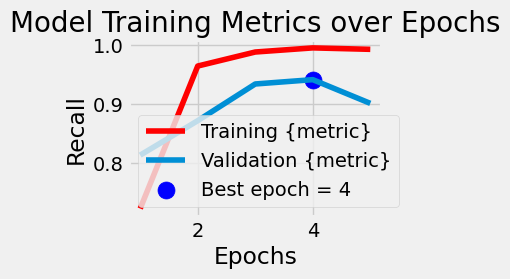

In [ ]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]
#plot
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')
for i, m in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[m]) + 1)
  plt.plot(epochs, tr_metrics[m],'r' ,label = 'Training {metric}')
  plt.plot(epochs, val_metrics[m], label = 'Validation {metric}')
  plt.scatter(best_epochs[m], best_values[m], s = 150, c = 'blue', label = f'Best epoch = {best_epochs[m]}')
  plt.title(f'Training and Validation {m}')
  plt.xlabel('Epochs')
  plt.ylabel(m.title())
  plt.legend()
  plt.grid(True)
  plt.title('Model Training Metrics over Epochs', fontsize = 20)
  plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)
print(f"Training Score: {train_score[1]*100:.2f}%")
print(f"Train loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Score: {valid_score[0]}")
print(f"Testing Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing Loss: {test_score[0]}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 245ms/step - accuracy: 0.9316 - loss: 0.1856 - precision: 0.9368 - recall: 0.9257
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 247ms/step - accuracy: 0.9051 - loss: 0.3321 - precision: 0.9121 - recall: 0.8992


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.9325 - loss: 0.1676 - precision: 0.9385 - recall: 0.9292
Training Score: 93.66%
Train loss: 0.1785
Validation Accuracy: 90.72%
Validation Score: 0.3215276300907135
Testing Accuracy: 93.45%
Testing Loss: 0.17644529044628143


90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step


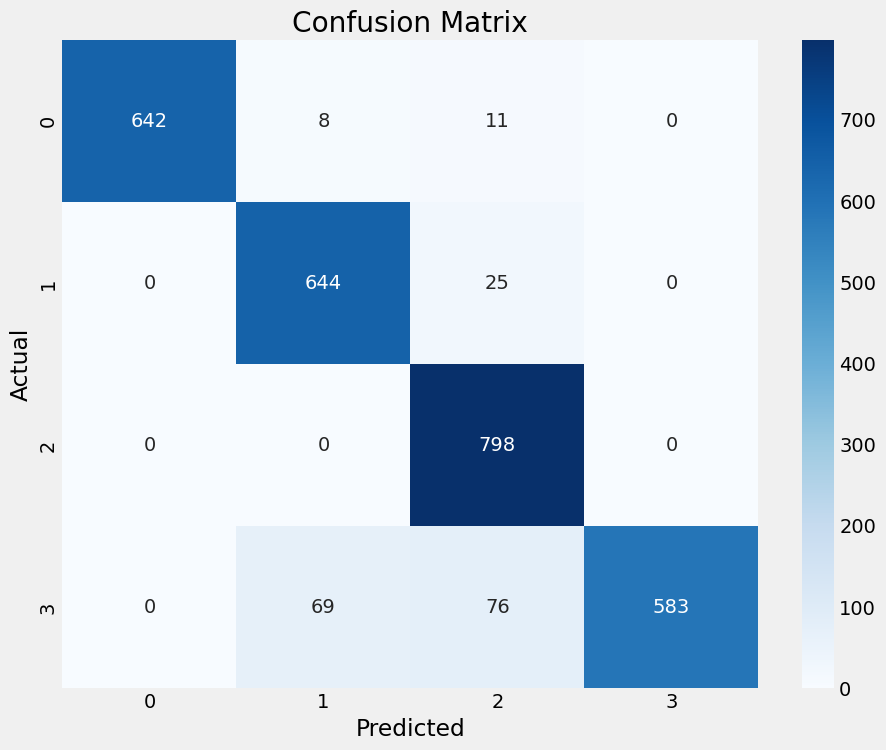

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)
class_dict = {
    0: "glioma_tumor",
    1: "meningioma_tumor",
    2: "no_tumor",
    3: "pituitary_tumor"
}
cn = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cn, annot = True, fmt = 'd', cmap = 'Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image
def predict(img_path:str) -> None:
  labels = list(class_dict.values())
  plt.figure(figsize = (6,8))
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array = img_array/255
  prediction = model.predict(img_array)
  probabilities = list(prediction[0])
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]
  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Predicted: {predicted_class}")
  plt.subplot(2,1,2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability')
  plt.title(f"Class Probabilities")
  ax = plt.gca()
  ax.bar_label(bars, fmt = '%.2f')
  plt.tight_layout()
  plt.show()
  print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


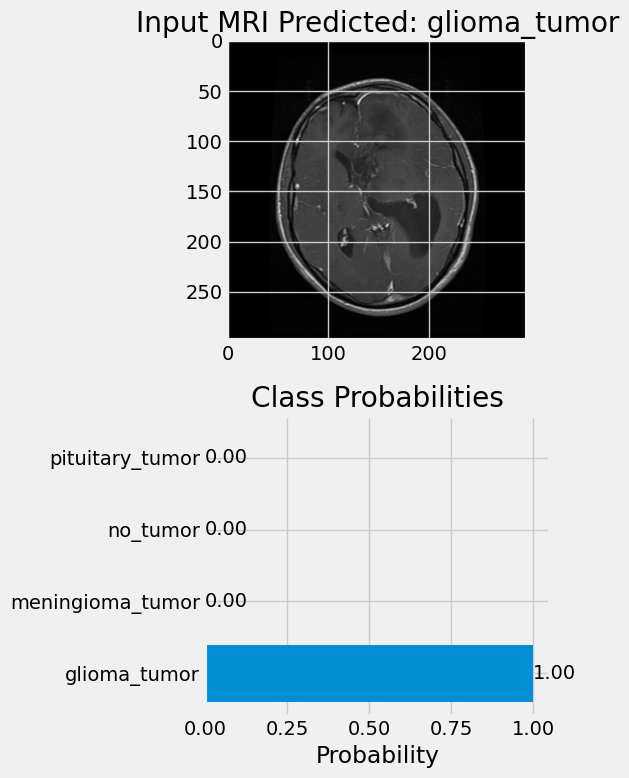

Predicted Class: glioma_tumor


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0009.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


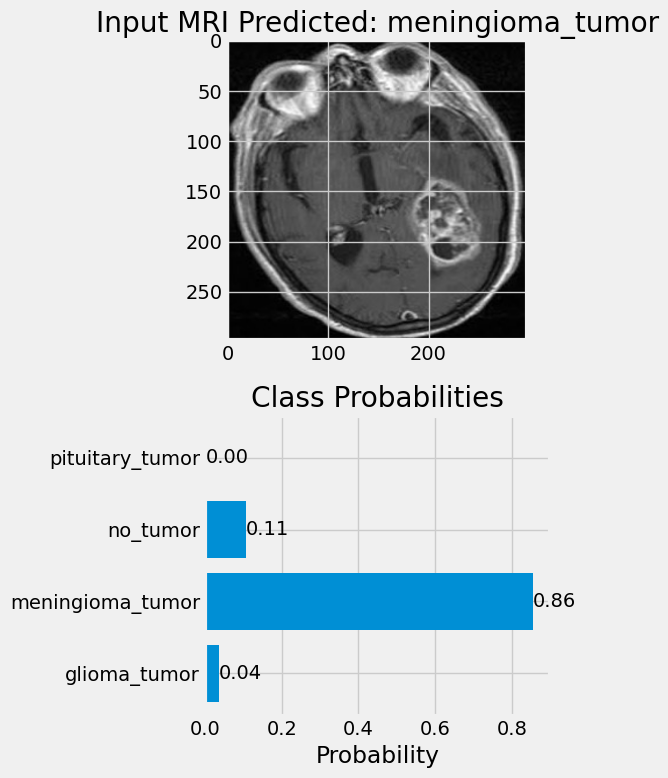

Predicted Class: meningioma_tumor


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0001.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16
img_size = (224, 224)
image_generator = ImageDataGenerator(rescale = 1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale = 1/255)
tr_gen = image_generator.flow_from_dataframe(
    dataframe = ts_df,
    x_col = "Class Path",
    y_col = "Class",
    target_size = img_size)
valid_gen = image_generator.flow_from_dataframe(
    dataframe = valid_df,
    x_col = "Class Path",
    y_col = "Class",
    target_size = img_size)
ts_gen = image_generator.flow_from_dataframe(
    dataframe = ts_df,
    x_col = "Class Path",
    y_col = "Class",
    target_size = img_size, shuffle = False)

Found 2856 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Conv2D(32, (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate = 0.25))
cnn_model.add(Conv2D(64, (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))
cnn_model.add(Dense(4, activation = 'softmax'))
cnn_model.compile(Adamax(learning_rate = 0.001),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy',
                                Precision(),
                                Recall()])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      11,075,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,105,508 (42.36 MB)

 Trainable params: 11,105,508 (42.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen,
                 validation_data = valid_gen,
                 epochs = 5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 306ms/step - accuracy: 0.4568 - loss: 3.1017 - precision_1: 0.5797 - recall_1: 0.2061 - val_accuracy: 0.6730 - val_loss: 1.1292 - val_precision_1: 0.7724 - val_recall_1: 0.5252
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.7279 - loss: 1.0328 - precision_1: 0.7852 - recall_1: 0.6150 - val_accuracy: 0.7868 - val_loss: 0.8001 - val_precision_1: 0.8359 - val_recall_1: 0.6919
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.7758 - loss: 0.7829 - precision_1: 0.8169 - recall_1: 0.7167 - val_accuracy: 0.7843 - val_loss: 0.7589 - val_precision_1: 0.8178 - val_recall_1: 0.7321
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.8099 - loss: 0.6853 - precision_1: 0.8414 - recall_1: 0.7665 - val_accuracy: 0.8109 - val_loss: 0.6686 - val_precision_1: 0.8461 - val_recall_1: 0.7602
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.8211 - loss: 0.6199 - precision_1: 0.8457 - recall_1: 0.7857 - val_accur

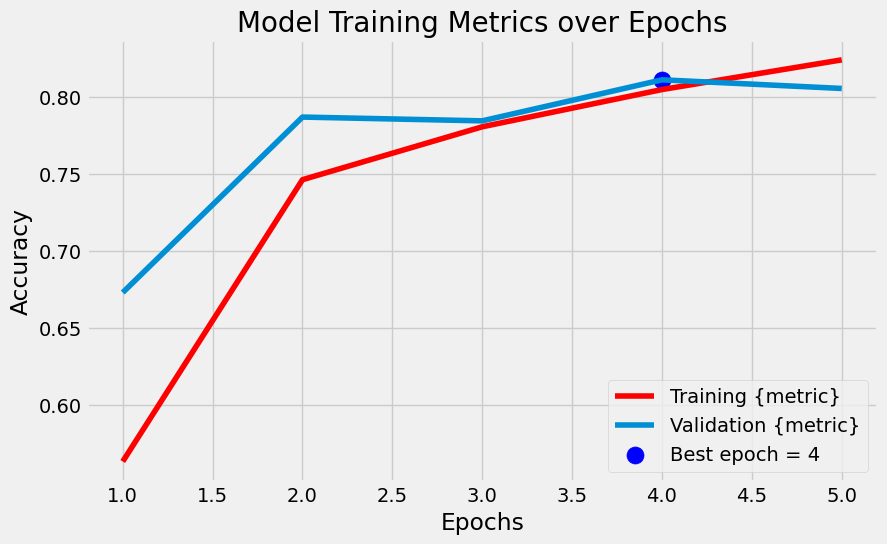

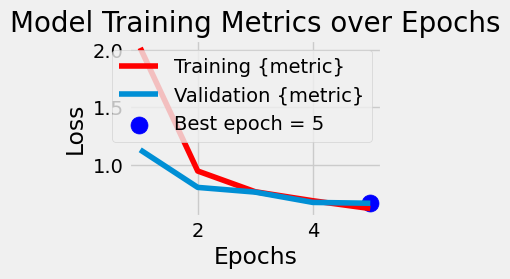

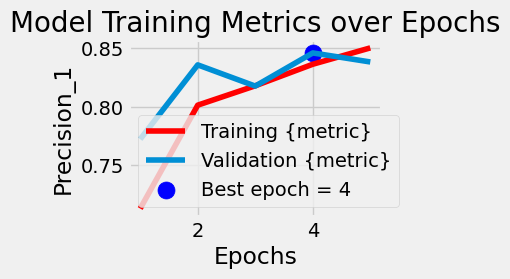

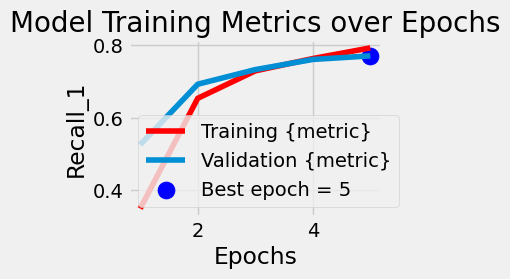

In [ ]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]
#plot
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')
for i, m in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[m]) + 1)
  plt.plot(epochs, tr_metrics[m],'r' ,label = 'Training {metric}')
  plt.plot(epochs, val_metrics[m], label = 'Validation {metric}')
  plt.scatter(best_epochs[m], best_values[m], s = 150, c = 'blue', label = f'Best epoch = {best_epochs[m]}')
  plt.title(f'Training and Validation {m}')
  plt.xlabel('Epochs')
  plt.ylabel(m.title())
  plt.legend()
  plt.grid(True)
  plt.title('Model Training Metrics over Epochs', fontsize = 20)
  plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose = 1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)
print(f"Training Score: {train_score[1]*100:.2f}%")
print(f"Train loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Score: {valid_score[0]}")
print(f"Testing Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing Loss: {test_score[0]}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8597 - loss: 0.5693 - precision_1: 0.8938 - recall_1: 0.8149
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8099 - loss: 0.6573 - precision_1: 0.8391 - recall_1: 0.7729
 1/90 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.9062 - loss: 0.4724 - precision_1: 0.9310 - recall_1: 0.8438

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8561 - loss: 0.5678 - precision_1: 0.8800 - recall_1: 0.8153
Training Score: 86.20%
Train loss: 0.5605
Validation Accuracy: 81.09%
Validation Score: 0.6586845517158508
Testing Accuracy: 85.85%
Testing Loss: 0.5622552633285522


90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step


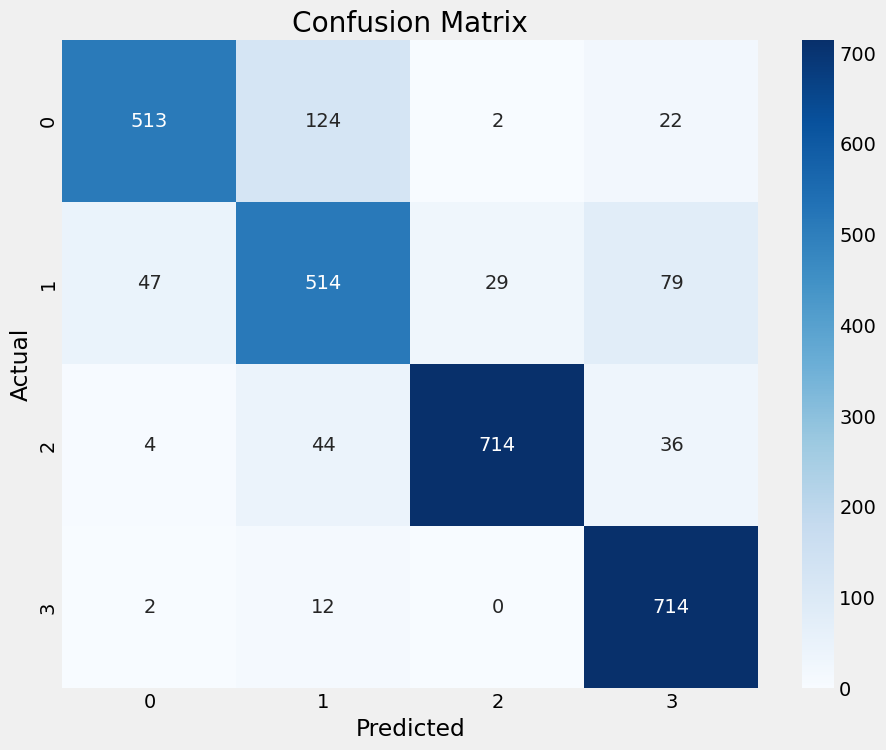

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)
class_dict = {
    0: "glioma_tumor",
    1: "meningioma_tumor",
    2: "no_tumor",
    3: "pituitary_tumor"
}
cn = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cn, annot = True, fmt = 'd', cmap = 'Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred, target_names = list(class_dict.values()))
print(clr)

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.78      0.84       661
meningioma_tumor       0.74      0.77      0.75       669
        no_tumor       0.96      0.89      0.93       798
 pituitary_tumor       0.84      0.98      0.90       728

        accuracy                           0.86      2856
       macro avg       0.86      0.85      0.86      2856
    weighted avg       0.86      0.86      0.86      2856



In [ ]:
cnn_model.save_weights("cnn_model.weights.h5")

Part 2 Streamlit App


In [ ]:
!pip install pyngrok streamlit
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('ngrok_token')
ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit /content/app.py --server.port 8501")

In [ ]:
#write file
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import numpy as np
from PIL import Image
import os
import plotly.graph_objects as go
import cv2
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok = True)

def generate_explanation(img_path, model_prediction, confidence):
  prompt = f"""
Explain the saliency image based on model prediction, and confidence for the given image as an expert neurosurgeon



**Model Prediction:** {model_prediction}
**Confidence:** {confidence}

**Explanation:**

The saliency map highlights the regions of the image that were most important for the model's prediction. The model predicted that the image contains {model_prediction} with a confidence of {confidence}.

**Additional Information:**

The model is  trained on a dataset of brain MRI images with glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor. It was designed to classify images into four categories: glioma tumor, meningioma tumor, no tumor, and pituitary tumor.
Let us think step by step and verify step by step
"""
  img = PIL.Image.open(img_path)
  model = genai.GenerativeModel(model_name = 'gemini-1.5-flash')
  response = model.generative_content([prompt, img])
  return response.text
def load_xception_model(model_path):
  img_shape = (299, 299, 3)
  base_model = tf.keras.applications.Xception(input_shape = img_shape, include_top = False, weights = "imagenet", pooling = "max")
  model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.5),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')
  ])
  model.build((None,) + img_shape)
  model.compile(Adamax(learning_rate = 0.001),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy',
                                Precision(),
                                Recall()])
  model.load_weights(model_path)
  return model

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]
  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=1)
  gradients = gradients.numpy().squeeze()
  gradients = cv2.resize(gradients, img_size)
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0],center[1]) - 10
  y,x = np.ogrid[:gradients.shape[0],:gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2
  gradients = gradients * mask
  brain_gradients = gradients(mask)
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0
  gradients = cv2.GaussianBlur(gradients, (11,11),0)
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
  heatmap = cv2.resize(heatmap, img_size)
  original_img = image.img_to_array(img)
  superimposed_img = heatmap*0.7 + original_img*0.3
  superimposed_img = superimposed_img.astype(np.uint8)
  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, 'wb') as f:
    f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_maps/{uploaded_file_name}'
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img,cv2.COLOR_BGR2RGB))
  return superimposed_img
st.title("Brain Tumor Classification")
st.write("Upload an MRI image to classify")
uploaded_file = st.file_uploader("Choose an image...", type = ["jpg", "jpeg", "png"])
img_size = (299, 299)
if uploaded_file is not None:
  selected_model = st.radio("Select a model", ("TL-Xception", "Custom CNN"))
  if selected_model == "TL-Xception":
    model_path = load_xception_model("/content/xception_model.weights.h5")

  else:
    model_path = load_model("/content/cnn_model.weights.h5")
    img_size = (224, 224)

  labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
  img = image.load_img(uploaded_file, target_size = img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array = img_array/255.0
  prediction = model.predict(img_array)
  predicted_class_idx = np.argmax(prediction[0])
  result = labels[predicted_class_idx]
  st.write(f"Predicted Class: {result}")
  st.write("Prediction Probabilities:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob*100:.2f}%")
  saliency_map = generate_saliency_map(model, img_array, predicted_class_idx, img_size)
  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption = "Uploaded Image", use_column_width = True)
  with col2:
    st.image(saliency_map, caption = "Saliency Image", use_column_width = True)
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][predicted_class_idx])
  st.write("Explanation:")
  st.write(explanation)


2024-11-16 12:19:36.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 12:19:36.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
thread = Thread(target = run_streamlit())
thread.start()

In [ ]:
public_url = ngrok.connect(addr = '8501', proto = 'http', bind_tls = True)
print(public_url)

NgrokTunnel: "https://a412-35-188-223-94.ngrok-free.app" -> "http://localhost:8501"
